### Importing the Required Libraries

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

### Loading the dataset into Train and Test set

In [196]:
fashion = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) =fashion.load_data()

In [197]:
X_train_full.shape

(60000, 28, 28)

In [198]:
X_test.shape

(10000, 28, 28)

### Splitting the dataset into Train and Validation set. Along with that scaling the data

In [199]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.

In [200]:
X_valid.shape

(5000, 28, 28)

### Total Number of Target Class

Types of Category of Fashion


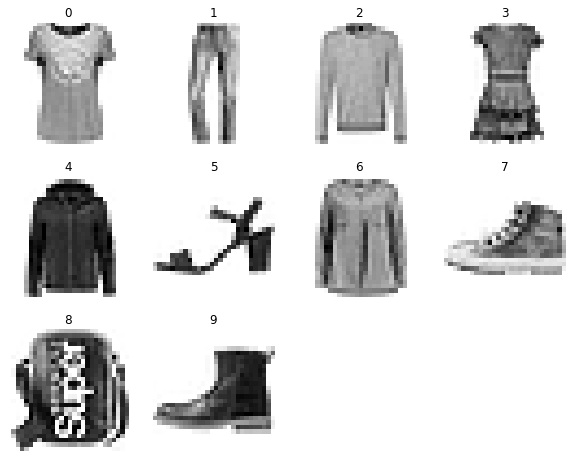

In [201]:
# lets  visualize the dataset

print("Types of Category of Fashion")
plt.figure(figsize=(10,8))

for i in range(10):
  index = np.where(y_train == i)
  plt.subplot(3,4,i+1)
  plt.imshow(X_train[index[0][0]], cmap='binary')
  plt.title(i)
  plt.axis("off")
  
plt.show()

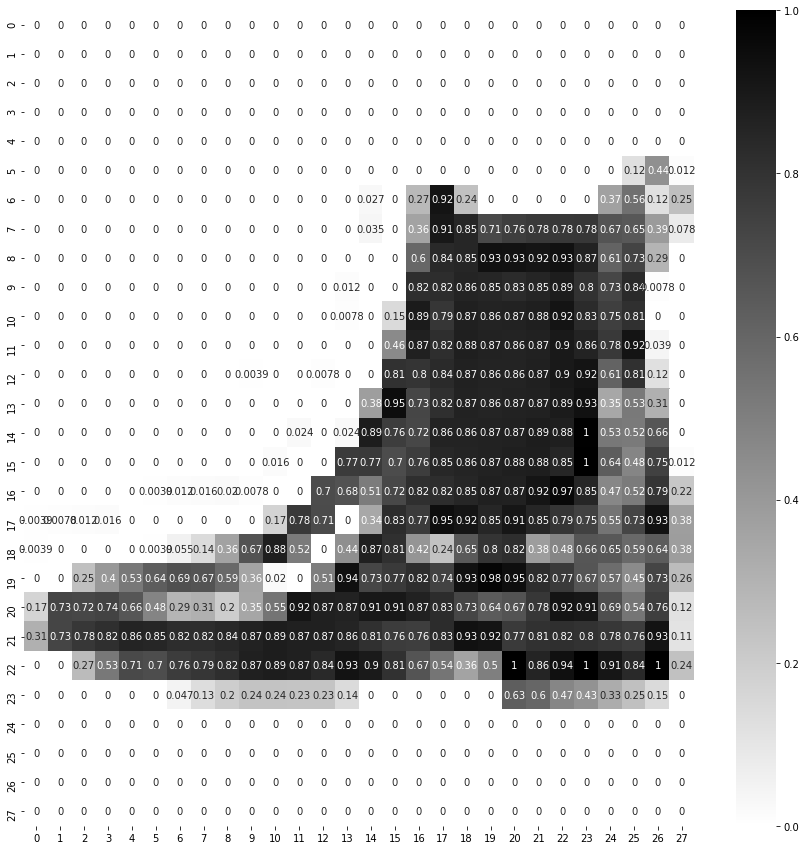

In [238]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[5],annot=True, cmap='binary')

In [203]:
y_train[5]

9

### Creating the model

In [204]:
Layers = [tf.keras.layers.Flatten(input_shape=[28,28], name = "inputlayer"),
          tf.keras.layers.Dense(300, activation='relu', name = "hiddenlayer1"),
          tf.keras.layers.Dense(100, activation='relu', name = 'hiddenlayer2'),
          tf.keras.layers.Dense(50, activation='relu', name = 'hiddenlayer3'),
          tf.keras.layers.Dense(10, activation='softmax', name = "outputlayer")
          ]

In [205]:
model_cf = tf.keras.models.Sequential(Layers)

In [206]:
model_cf.layers

In [207]:
model_cf.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
hiddenlayer3 (Dense)         (None, 50)                5050      
_________________________________________________________________
outputlayer (Dense)          (None, 10)                510       
Total params: 271,160
Trainable params: 271,160
Non-trainable params: 0
_________________________________________________________________


Lets see the weights of hidden layer

In [208]:
hidden2 = model_cf.layers[2]
hidden2.name

'hiddenlayer2'

In [209]:
hidden2.get_weights()

[array([[-0.11392444, -0.08563126, -0.06139256, ..., -0.04374183,
          0.05752394,  0.02367608],
        [ 0.08359232, -0.10234559, -0.05247403, ..., -0.00606108,
          0.07737882,  0.08023573],
        [ 0.1192883 , -0.11670114,  0.03162383, ...,  0.04130694,
          0.05505034,  0.05821829],
        ...,
        [-0.08751817,  0.06971972, -0.08181503, ...,  0.03354161,
         -0.07442367,  0.0513204 ],
        [ 0.00407761, -0.10498266,  0.09005743, ...,  0.00994962,
         -0.10715574,  0.06969946],
        [ 0.0684609 , -0.05436828, -0.06474427, ...,  0.0113646 ,
         -0.00590886,  0.1029835 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [210]:
weights, biases = hidden2.get_weights()

In [211]:
weights.shape

(300, 100)

In [212]:
biases.shape

(100,)

In [213]:
from keras.optimizers import SGD

Loss_function = "sparse_categorical_crossentropy"
optimizer = SGD(learning_rate=0.01)
metrics = "accuracy"

model_cf.compile(loss=Loss_function, optimizer=optimizer, metrics=metrics)

### Finally fitting the model with 20 epoches

In [215]:
Epoches = 20
Validation_set = (X_valid, y_valid)

history = model_cf.fit(X_train, y_train, epochs = Epoches, validation_data = Validation_set, batch_size=32)

Epoch 1/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.7334 - accuracy: 0.7521 - val_loss: 0.4900 - val_accuracy: 0.8346
Epoch 2/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4818 - accuracy: 0.8294 - val_loss: 0.4436 - val_accuracy: 0.8520
Epoch 3/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4308 - accuracy: 0.8480 - val_loss: 0.4191 - val_accuracy: 0.8486
Epoch 4/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4023 - accuracy: 0.8565 - val_loss: 0.3897 - val_accuracy: 0.8648
Epoch 5/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3799 - accuracy: 0.8643 - val_loss: 0.3740 - val_accuracy: 0.8684
Epoch 6/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3649 - accuracy: 0.8697 - val_loss: 0.3545 - val_accuracy: 0.8752
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3492 - accuracy: 0.8752 - val_loss: 0.3531 - val_accuracy:

### Saving the model for futher use

In [217]:
model_cf.save('Fashion.h5')

model Fashion.h5 will be saved at Trained_model/Fashion.h5


'Trained_model/Fashion.h5'

### Visualizing the loses and Accuracy

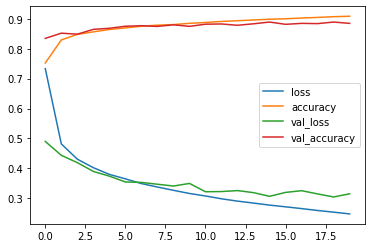

In [219]:
pd.DataFrame(history.history).plot()

### Evaluating the model on test dataset

In [220]:
model_cf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8725


[0.35526037216186523, 0.8725000023841858]

In [234]:
X_test[0:1].shape

(1, 28, 28)

### Let's predict the unseen data and see how our model works

In [235]:
X_new = X_test[0:1]
y_pred = model_cf.predict(X_new)
y_pred.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.019, 0.   ,
        0.979]], dtype=float32)

In [236]:
y_pred = np.argmax(y_pred, axis=1)
y_pred


array([9])

In [240]:
y_test_new = y_test[0]
y_test_new

9